In [1]:
using DifferentialEquations, DiffEqProblemLibrary, ParameterizedFunctions, Plots, ODE, ODEInterfaceDiffEq, LSODA
gr() #gr(fmt=:png)

f = @ode_def Orego begin
  dy1 = p1*(y2+y1*(1-p2*y1-y2))
  dy2 = (y3-(1+y1)*y2)/p1
  dy3 = p3*(y1-y3)
end p1=77.27 p2=8.375e-6 p3=0.161

prob = ODEProblem(f,[1.0,2.0,3.0],(0.0,30.0))
sol = solve(prob,Rodas5(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)
abstols = 1./10.^(4:11)
reltols = 1./10.^(1:8);


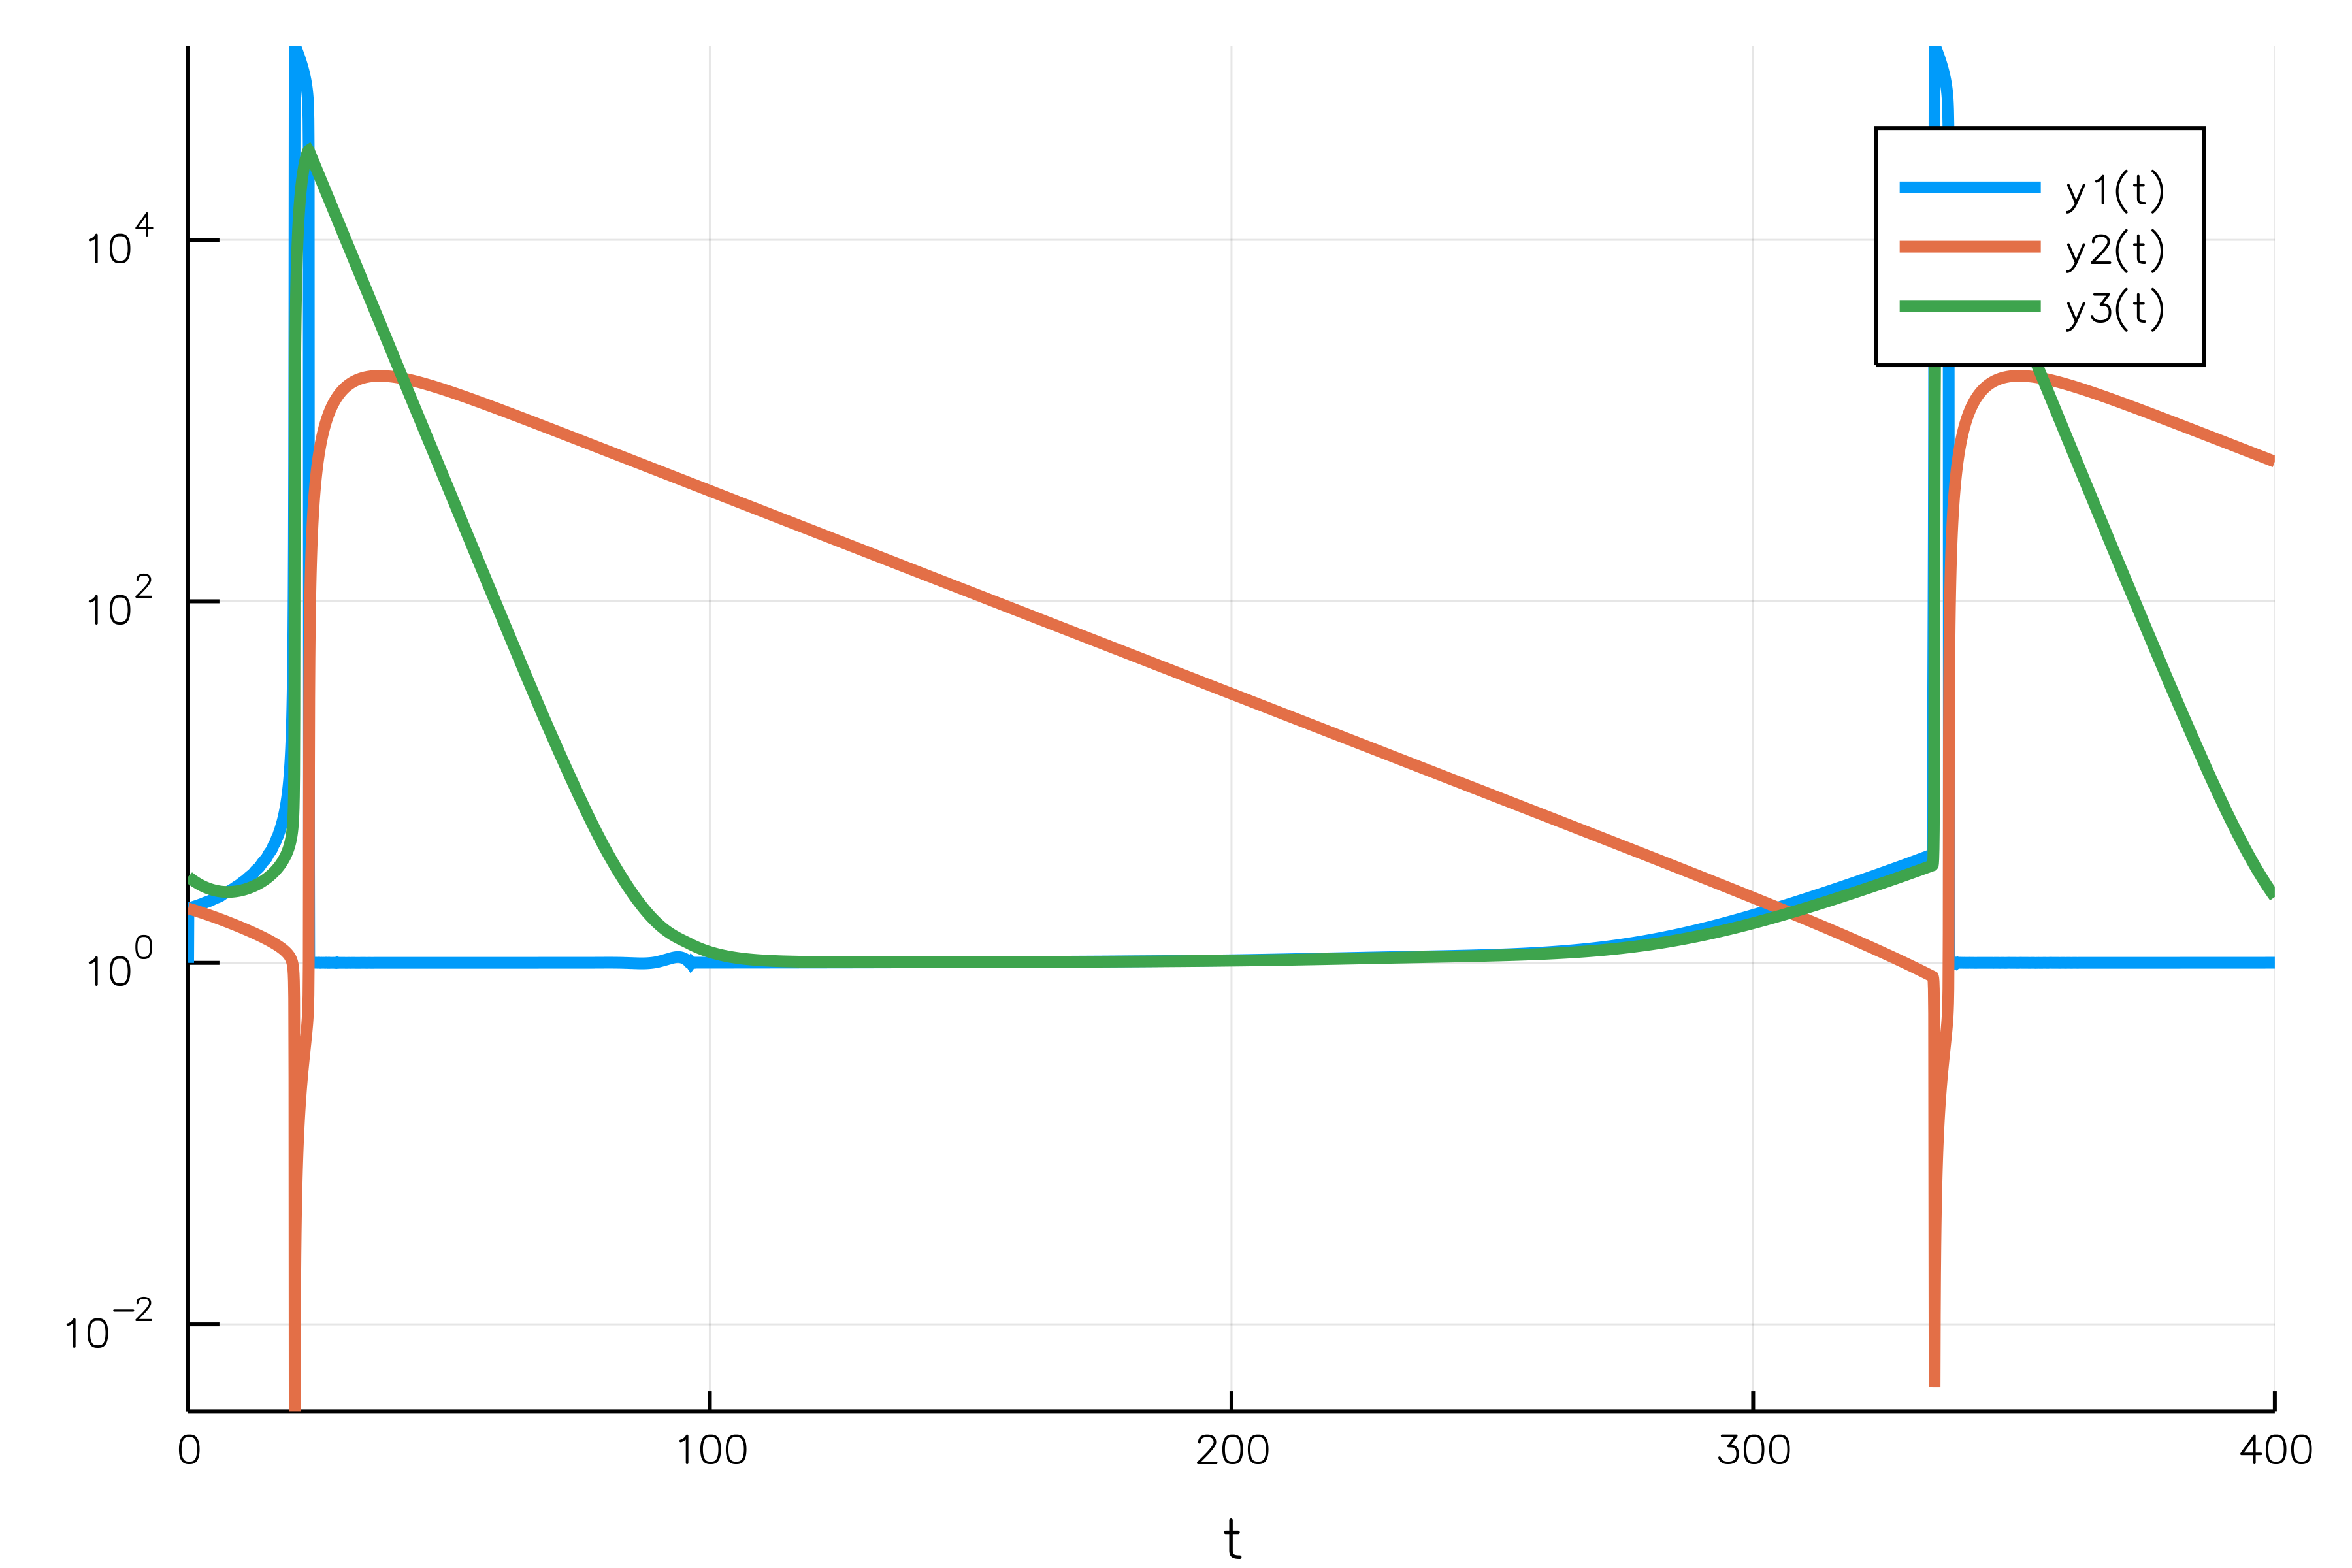

In [2]:
plot_prob = ODEProblem(f,[1.0,2.0,3.0],(0.0,400.0))
sol = solve(plot_prob,CVODE_BDF())
plot(sol,yscale=:log10)

## Omissions and Tweaking

The following were omitted from the tests due to convergence failures. ODE.jl's adaptivity is not able to stabilize its algorithms, while GeometricIntegrators.jl's methods either fail to converge at comparable dts (or on some computers errors)

In [3]:
sol = solve(prob,ode23s()); println("Total ODE.jl steps: $(length(sol))")
using GeometricIntegratorsDiffEq
try
    sol = solve(prob,GIRadIIA3(),dt=1/10)
catch e
    println(e)
end

Total ODE.jl steps: 1
MethodError(convert, (GeometricIntegrators.Solvers

In [4]:
sol = solve(prob,ARKODE(),abstol=1e-5,reltol=1e-1);


[ARKODE ERROR]  ARKode
  At t = 28.3953 and h = 2.55168e-05, the error test failed repeatedly or with |h| = hmin.



In [8]:
sol = solve(prob,ARKODE(nonlinear_convergence_coefficient = 1e-3),abstol=1e-5,reltol=1e-1);

In [10]:
sol = solve(prob,ARKODE(order=3),abstol=1e-5,reltol=1e-1);


[ARKODE ERROR]  ARKode
  At t = 27.5838 and h = 3.21665e-05, the error test failed repeatedly or with |h| = hmin.



In [14]:
sol = solve(prob,ARKODE(order=3,nonlinear_convergence_coefficient = 1e-5),abstol=1e-5,reltol=1e-1);

In [15]:
sol = solve(prob,ARKODE(order=5),abstol=1e-5,reltol=1e-1);

## High Tolerances

This is the speed when you just want the answer.

In [2]:
abstols = 1./10.^(5:8)
reltols = 1./10.^(1:4);
setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>Rodas3()),
          Dict(:alg=>TRBDF2()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>rodas()),
          Dict(:alg=>radau()),
          Dict(:alg=>lsoda())]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 2 
 
 
 10 
 
 
 - 
 
 
 1 
 
 
 10 
 
 
 0 
 
 
 10 
 
 
 1 
 
 
 10 
 
 
 2 
 
 
 10 
 
 
 3 
 
 
 10 
 
 
 - 
 
 
 3.4 
 
 
 10 
 
 
 - 
 
 
 3.3 
 
 
 10 
 
 
 - 
 
 
 3.2 
 
 
 10 
 
 
 - 
 
 
 3.1 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.9 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Rodas3 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [3]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;dense = false,verbose=false,
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:l2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 1 
 
 
 10 
 
 
 2 
 
 
 10 
 
 
 3 
 
 
 10 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 3.4 
 
 
 10 
 
 
 - 
 
 
 3.3 
 
 
 10 
 
 
 - 
 
 
 3.2 
 
 
 10 
 
 
 - 
 
 
 3.1 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.9 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Rodas3 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [4]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 0 
 
 
 10 
 
 
 1 
 
 
 10 
 
 
 2 
 
 
 10 
 
 
 3 
 
 
 10 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 3.4 
 
 
 10 
 
 
 - 
 
 
 3.3 
 
 
 10 
 
 
 - 
 
 
 3.2 
 
 
 10 
 
 
 - 
 
 
 3.1 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.9 
 
 
 10 
 
 
 - 
 
 
 2.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Rodas3 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [7]:
setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>Kvaerno3()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>KenCarp4()),
          Dict(:alg=>TRBDF2()),
          Dict(:alg=>KenCarp3()),
    # Dict(:alg=>SDIRK2()), # Removed because it's bad
          Dict(:alg=>radau())]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-2 
 
 
 10^-1 
 
 
 10^0 
 
 
 10^1 
 
 
 10^2 
 
 
 10^3 
 
 
 10^4 
 
 
 10^-3.4 
 
 
 10^-3.3 
 
 
 10^-3.2 
 
 
 10^-3.1 
 
 
 10^-3.0 
 
 
 10^-2.9 
 
 
 10^-2.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Kvaerno3 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 OrdinaryDiffEq.KenCarp3 
 
 
 
 ODEInterfaceDiffEq.radau

In [8]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;dense = false,verbose = false,
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:l2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^1 
 
 
 10^2 
 
 
 10^3 
 
 
 10^4 
 
 
 10^-3.4 
 
 
 10^-3.3 
 
 
 10^-3.2 
 
 
 10^-3.1 
 
 
 10^-3.0 
 
 
 10^-2.9 
 
 
 10^-2.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Kvaerno3 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 OrdinaryDiffEq.KenCarp3 
 
 
 
 ODEInterfaceDiffEq.radau

In [9]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^0 
 
 
 10^1 
 
 
 10^2 
 
 
 10^3 
 
 
 10^4 
 
 
 10^-3.4 
 
 
 10^-3.3 
 
 
 10^-3.2 
 
 
 10^-3.1 
 
 
 10^-3.0 
 
 
 10^-2.9 
 
 
 10^-2.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Kvaerno3 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 OrdinaryDiffEq.KenCarp3 
 
 
 
 ODEInterfaceDiffEq.radau

In [13]:
setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>KenCarp5()),
          Dict(:alg=>KenCarp4()),
          Dict(:alg=>KenCarp3()),
          Dict(:alg=>ARKODE(order=5)),
          Dict(:alg=>ARKODE(nonlinear_convergence_coefficient = 1e-6)),
          Dict(:alg=>ARKODE(nonlinear_convergence_coefficient = 1e-5,order=3))
          ]
names = ["Rosenbrock23" "KenCarp5" "KenCarp4" "KenCarp3" "ARKODE5" "ARKODE4" "ARKODE3"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      names=names,
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 2 
 
 
 10 
 
 
 0 
 
 
 10 
 
 
 2 
 
 
 10 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 3.25 
 
 
 10 
 
 
 - 
 
 
 3.00 
 
 
 10 
 
 
 - 
 
 
 2.75 
 
 
 10 
 
 
 - 
 
 
 2.50 
 
 
 10 
 
 
 - 
 
 
 2.25 
 
 
 10 
 
 
 - 
 
 
 2.00 
 
 
 10 
 
 
 - 
 
 
 1.75 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 Rosenbrock23 
 
 
 
 KenCarp5 
 
 
 
 KenCarp4 
 
 
 
 KenCarp3 
 
 
 
 ARKODE5 
 
 
 
 ARKODE4 
 
 
 
 ARKODE3

### Low Tolerances

This is the speed at lower tolerances, measuring what's good when accuracy is needed.

In [14]:
abstols = 1./10.^(7:13)
reltols = 1./10.^(4:10)

setups = [Dict(:alg=>GRK4A()),
          Dict(:alg=>Rodas4P()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>ddebdf()),
          Dict(:alg=>Rodas4()),
          Dict(:alg=>rodas()),
          Dict(:alg=>radau()),
          Dict(:alg=>lsoda())
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 8 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 2 
 
 
 10 
 
 
 0 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.5 
 
 
 10 
 
 
 - 
 
 
 2.0 
 
 
 10 
 
 
 - 
 
 
 1.5 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.GRK4A 
 
 
 
 OrdinaryDiffEq.Rodas4P 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.ddebdf 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [15]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;verbose=false,
                      dense=false,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:l2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 2 
 
 
 10 
 
 
 0 
 
 
 10 
 
 
 2 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.5 
 
 
 10 
 
 
 - 
 
 
 2.0 
 
 
 10 
 
 
 - 
 
 
 1.5 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.GRK4A 
 
 
 
 OrdinaryDiffEq.Rodas4P 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.ddebdf 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [16]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 2 
 
 
 10 
 
 
 0 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.5 
 
 
 10 
 
 
 - 
 
 
 2.0 
 
 
 10 
 
 
 - 
 
 
 1.5 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.GRK4A 
 
 
 
 OrdinaryDiffEq.Rodas4P 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.ddebdf 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [13]:
setups = [
          Dict(:alg=>Rodas5()),
          Dict(:alg=>Kvaerno5()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>KenCarp4()),
          Dict(:alg=>KenCarp5()),
          Dict(:alg=>Rodas4()),
          Dict(:alg=>radau())]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-8 
 
 
 10^-6 
 
 
 10^-4 
 
 
 10^-2 
 
 
 10^0 
 
 
 10^-3.0 
 
 
 10^-2.8 
 
 
 10^-2.6 
 
 
 10^-2.4 
 
 
 10^-2.2 
 
 
 10^-2.0 
 
 
 10^-1.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rodas5 
 
 
 
 OrdinaryDiffEq.Kvaerno5 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.KenCarp5 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.radau

In [17]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;verbose=false,
                      dense=false,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:l2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-4 
 
 
 10^-2 
 
 
 10^0 
 
 
 10^2 
 
 
 10^-3.0 
 
 
 10^-2.8 
 
 
 10^-2.6 
 
 
 10^-2.4 
 
 
 10^-2.2 
 
 
 10^-2.0 
 
 
 10^-1.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rodas5 
 
 
 
 OrdinaryDiffEq.Kvaerno5 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.KenCarp5 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.radau

In [15]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-6 
 
 
 10^-4 
 
 
 10^-2 
 
 
 10^0 
 
 
 10^-3.0 
 
 
 10^-2.8 
 
 
 10^-2.6 
 
 
 10^-2.4 
 
 
 10^-2.2 
 
 
 10^-2.0 
 
 
 10^-1.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rodas5 
 
 
 
 OrdinaryDiffEq.Kvaerno5 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.KenCarp5 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.radau

The following algorithms were removed since they failed.

In [16]:
#setups = [Dict(:alg=>Hairer4()),
          #Dict(:alg=>Hairer42()),
          #Dict(:alg=>Rodas3()),
          #Dict(:alg=>Kvaerno4()),
          #Dict(:alg=>Cash4())
#]
#wp = WorkPrecisionSet(prob,abstols,reltols,setups;
#                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
#plot(wp)

### Conclusion

At high tolerances, `Rosenbrock23` hits the the error estimates and is fast. At lower tolerances and normal user tolerances, `Rodas4` and `Rodas5` are extremely fast. When you get down to `reltol=1e-9` `radau` begins to become as efficient as `Rodas4`, and it continues to do well below that.